In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [105]:
df=pd.read_csv(r"C:\Users\Arigala.Adarsh\Downloads\Linear_Regression-4\new_insurance_data.csv")

In [106]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [107]:
df.shape

(1338, 13)

In [108]:
# If the target column is containing a continuous data --> Regression algo
# Regression --> Linear Regression, Decision Tree Regressor, Random Forest Regressor, Naive Bayes Reg, SVM

# If the target column is containing a categorical data --> Classification algo
# Classification --> Logistic Reg, Decision Tree Classifier, Random Forest Classifier, Naive Bayes Classifier,
#                    SVM Classifier

In [109]:
# import libraries
# import dataset
# EDA --> Exploratory Data Analysis --> To undersatand the data
# Data Cleaning
# Data Preprocessing
# Build Model

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [111]:
df.isnull()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False,False,False,False,False,False


In [112]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [113]:
# Replacing the null values
# When the data type is = object --> replace with mode()
# When the data type is = Numeric --> replace with mean()/median()


In [114]:
type(df)

pandas.core.frame.DataFrame

In [115]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [116]:
col=list(df.columns)

In [117]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [118]:
type(col)

list

In [119]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [120]:
 # Replacing the null values with mean and mode
for i in col:  # for i in col: i --> values present in col
    if df[i].dtypes=='object':
        #print('ob')
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        #print('num')
        df[i] = df[i].fillna(df[i].mean())

In [121]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [122]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [123]:
#seaborn
# I want to check the distribution of the data
import seaborn as sns

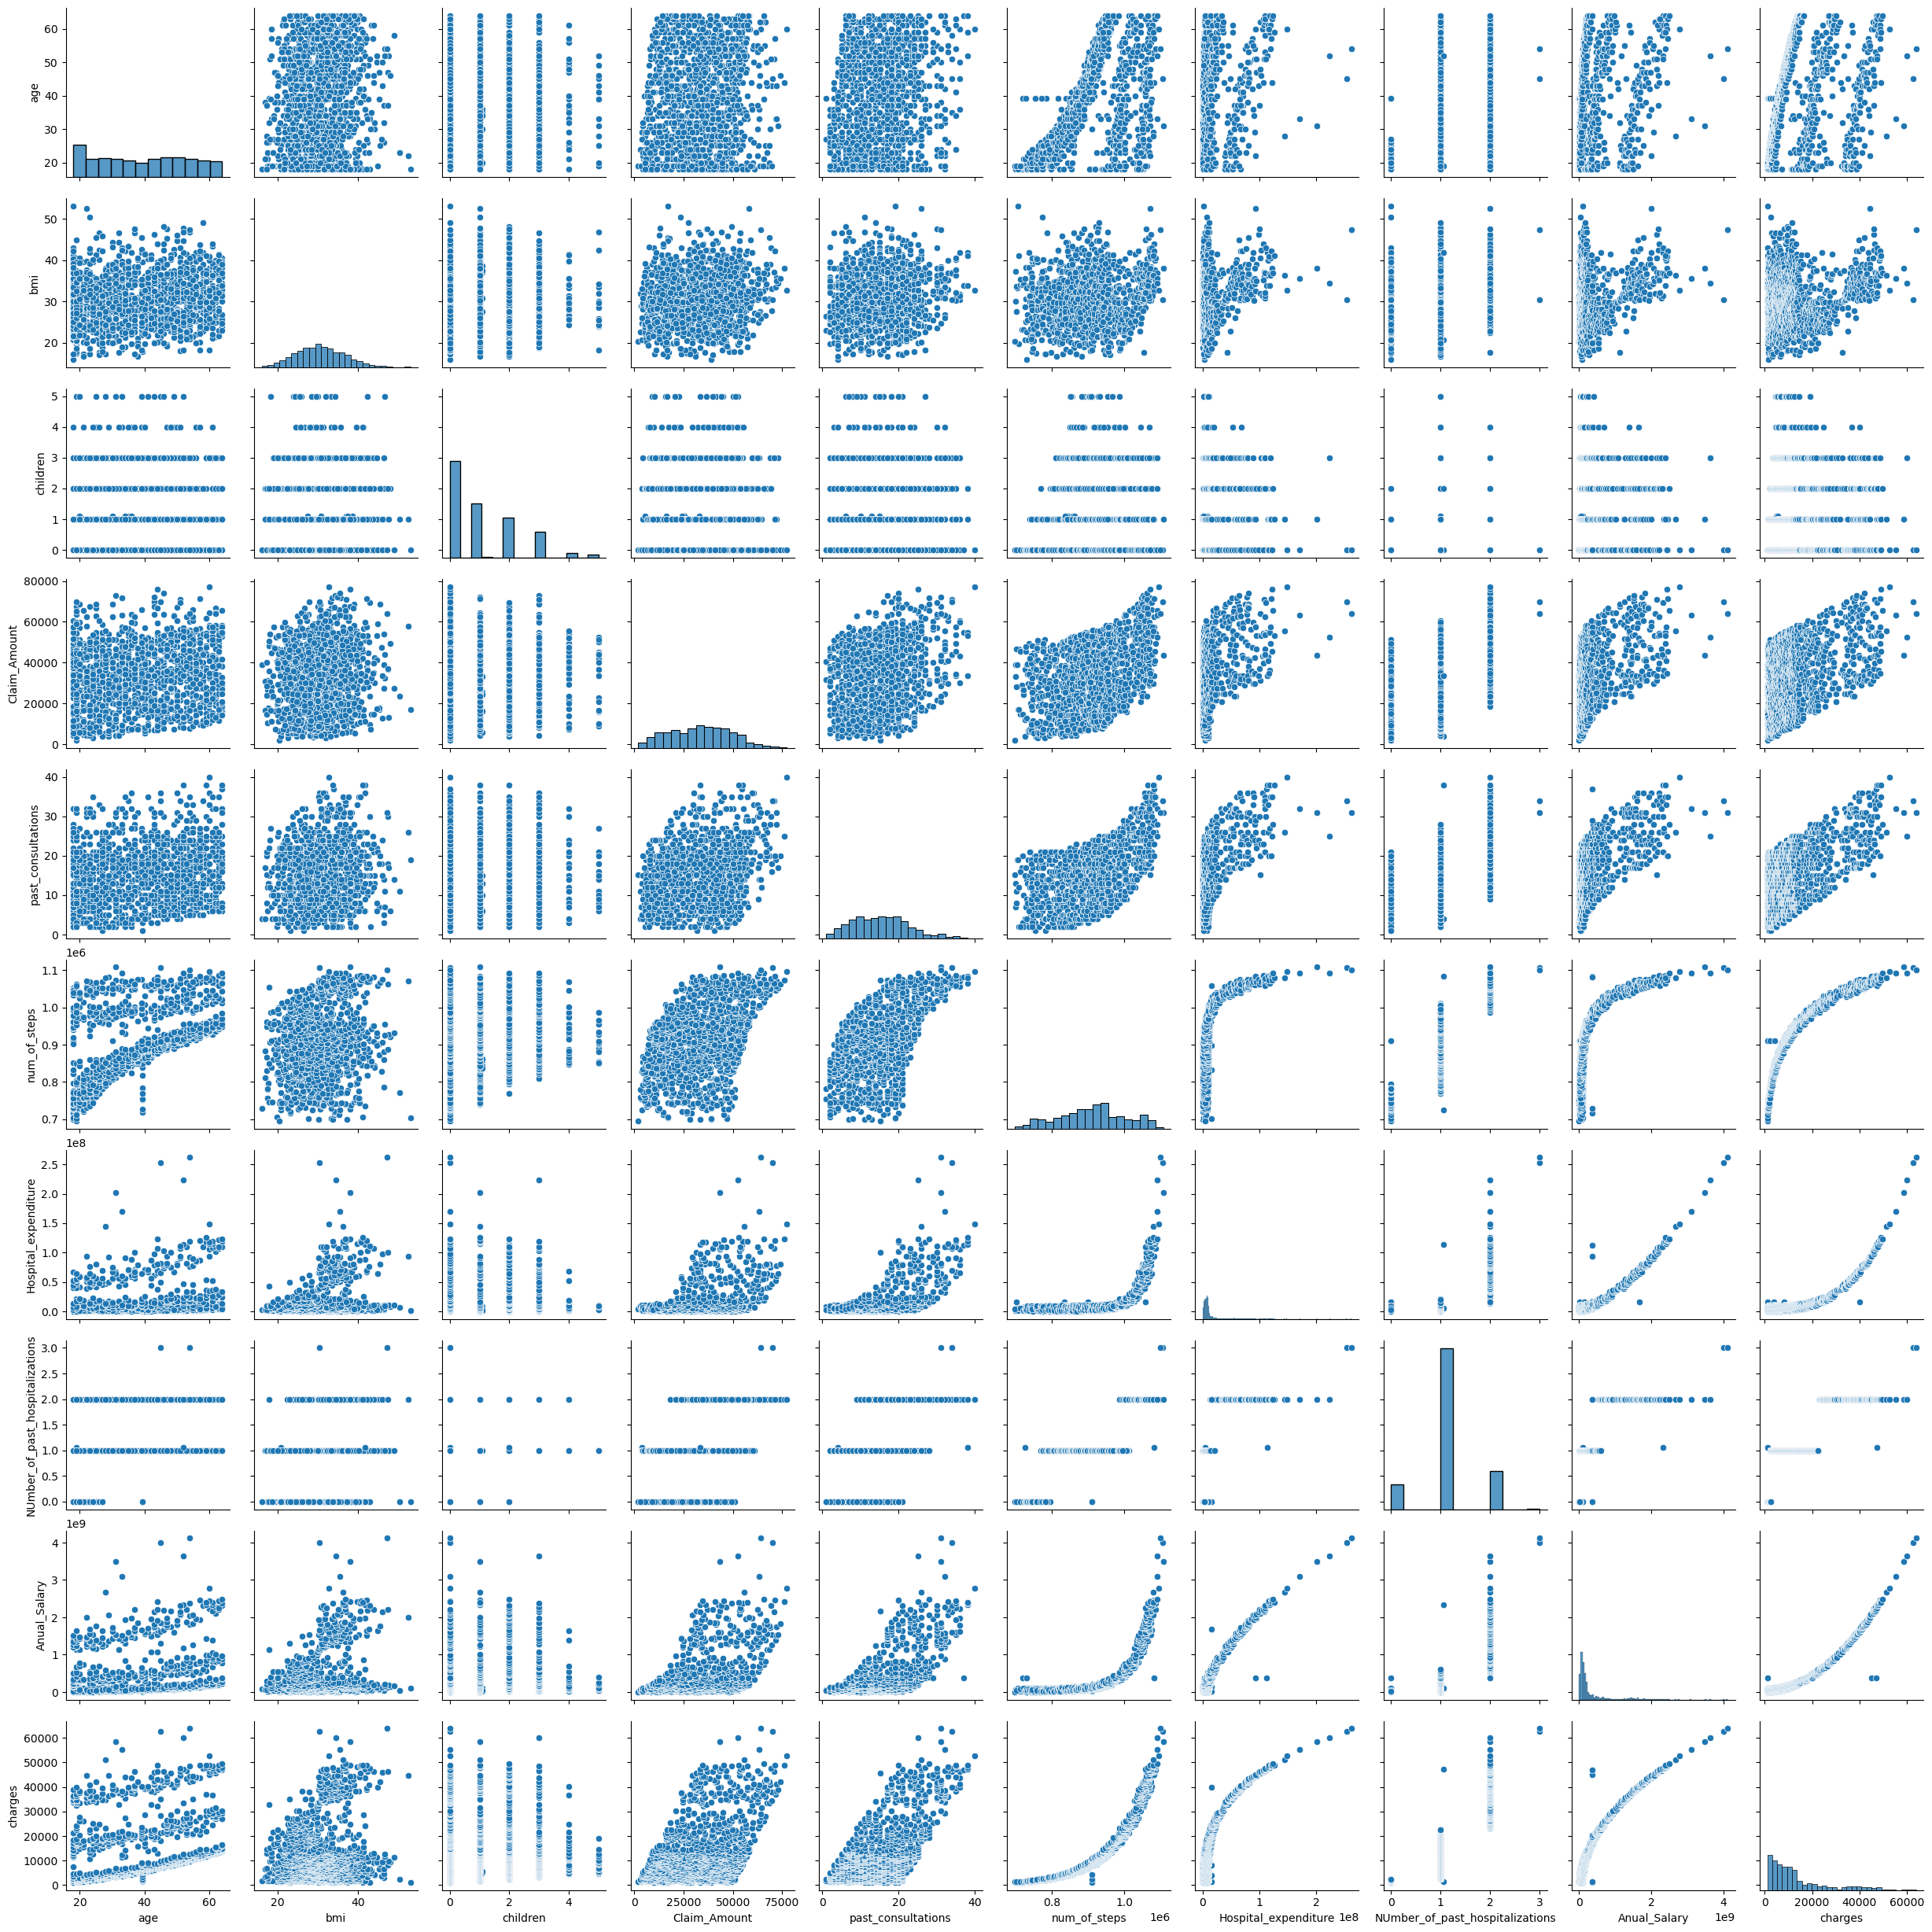

In [124]:
sns.pairplot(df)
plt.show()

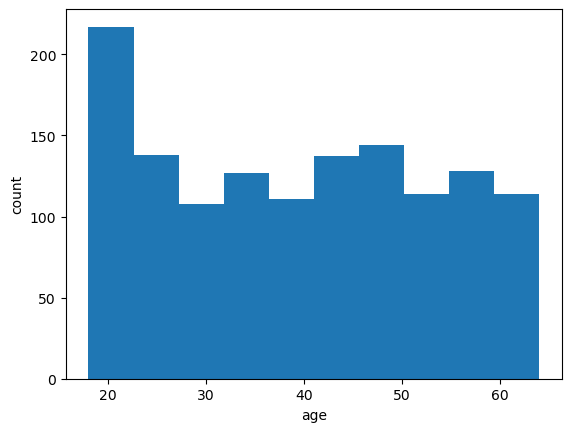

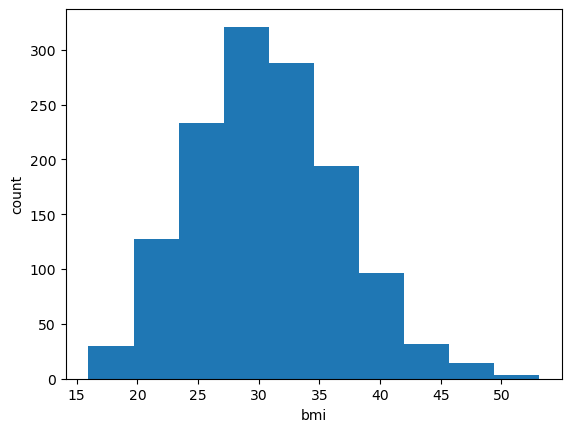

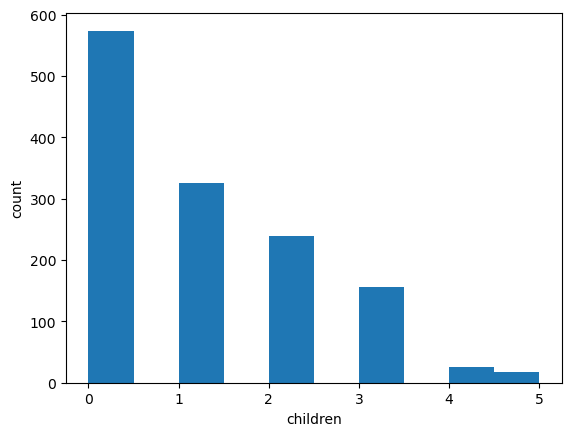

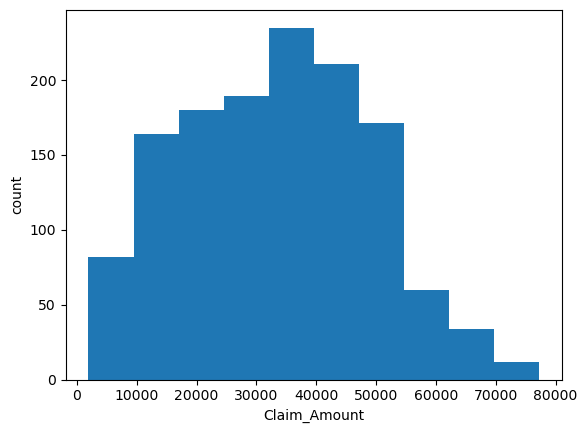

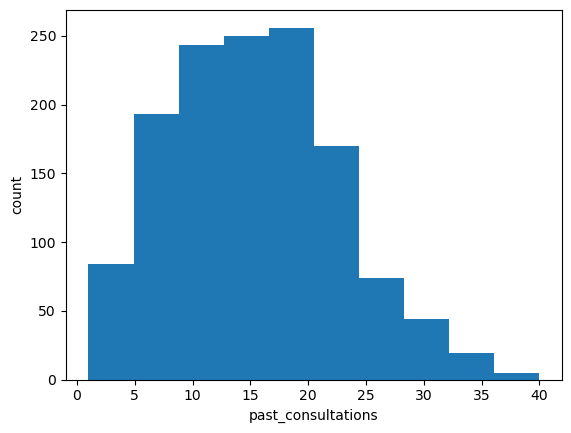

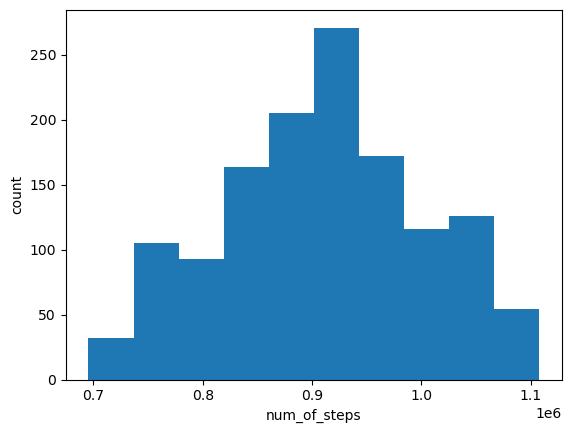

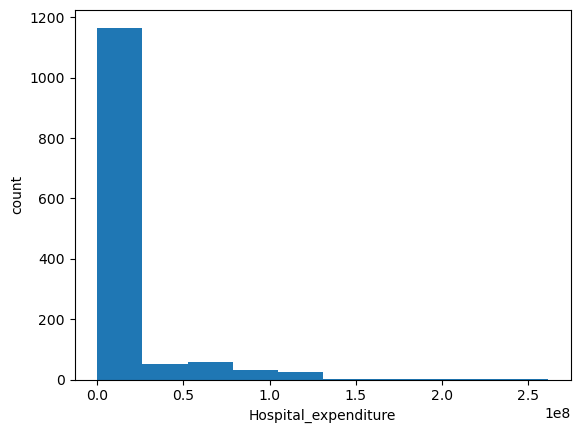

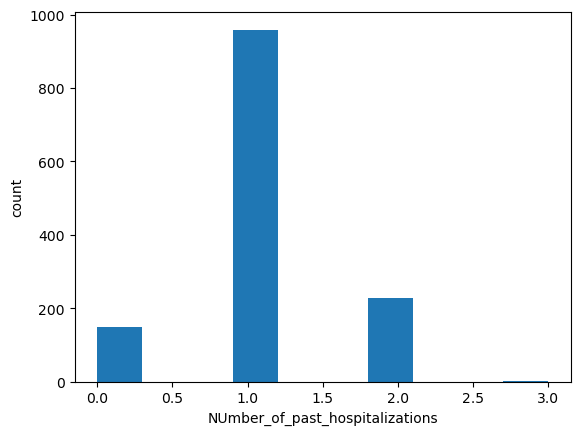

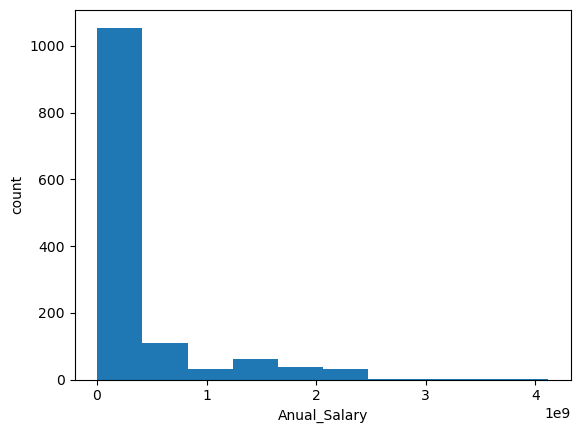

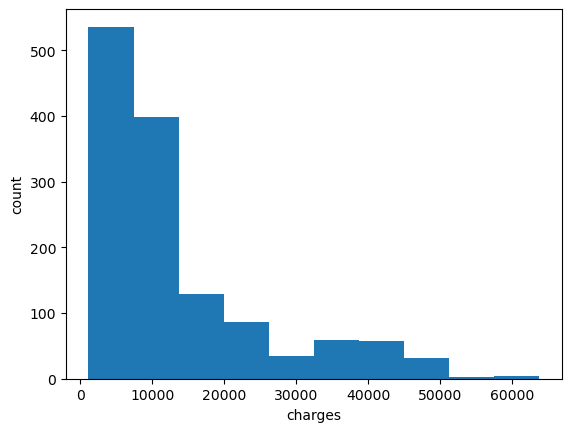

In [125]:
# The distribution of the data
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.hist(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

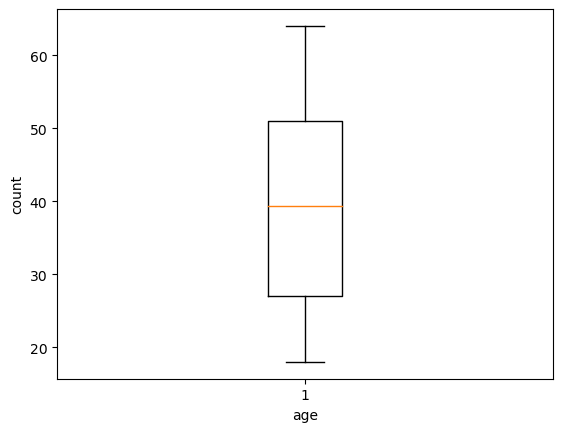

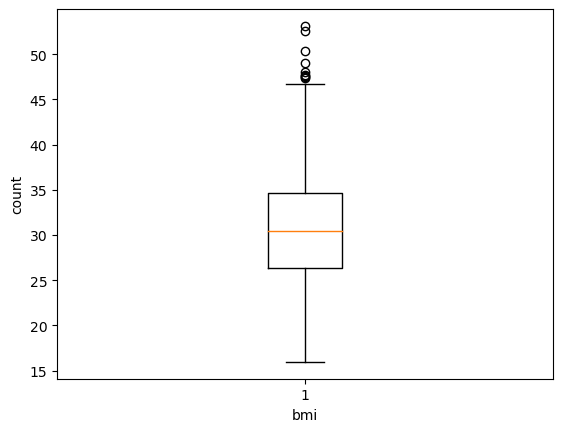

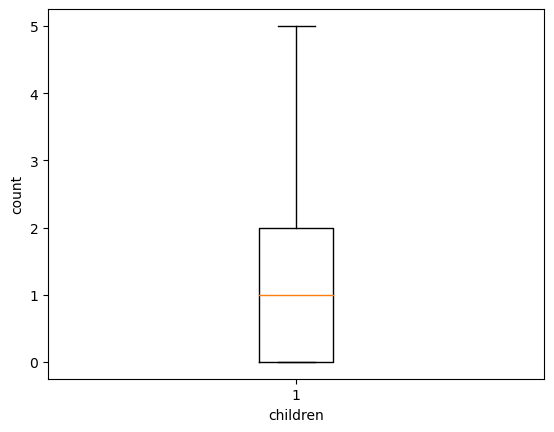

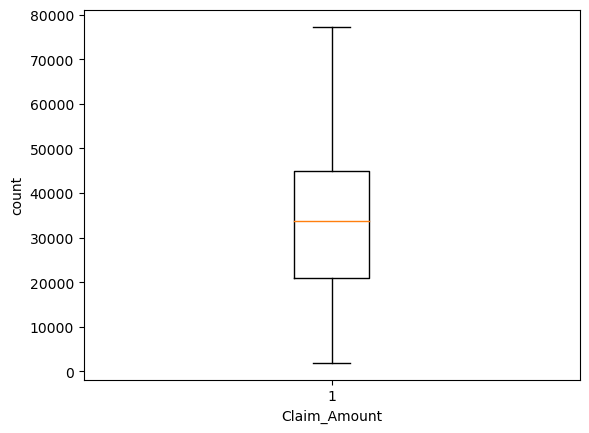

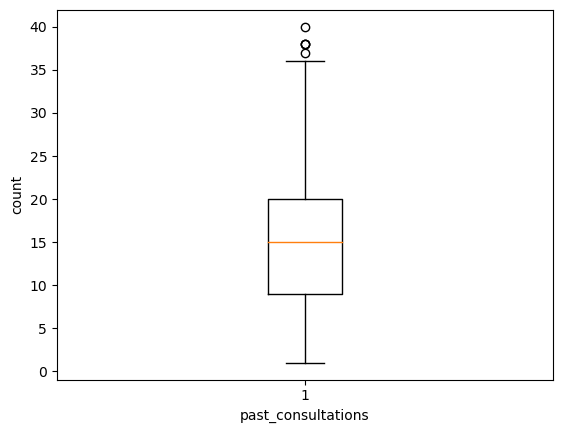

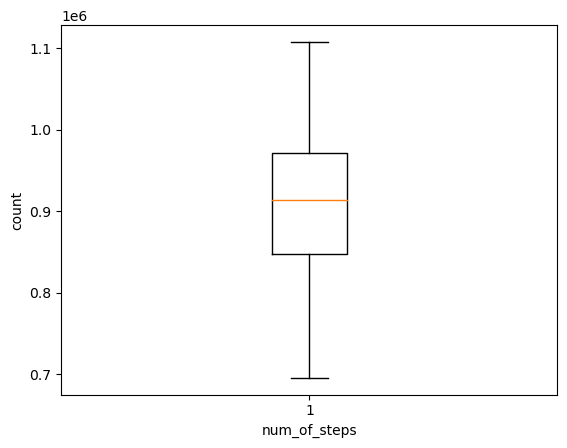

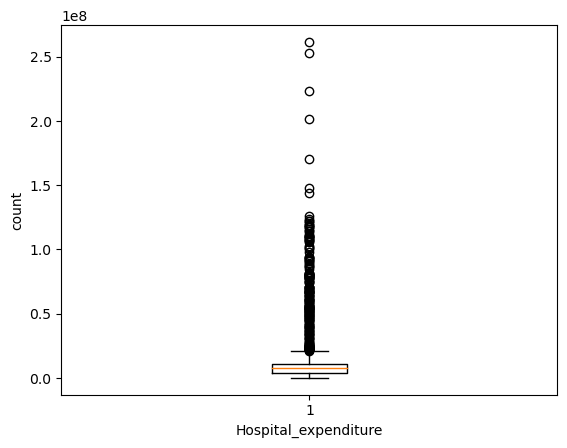

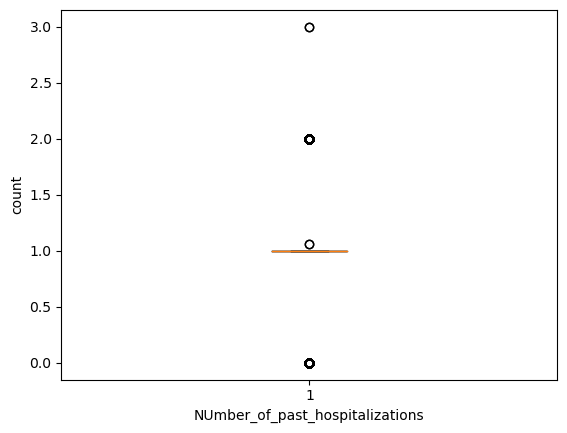

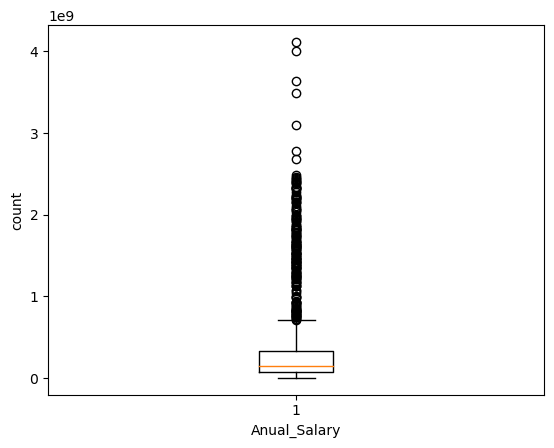

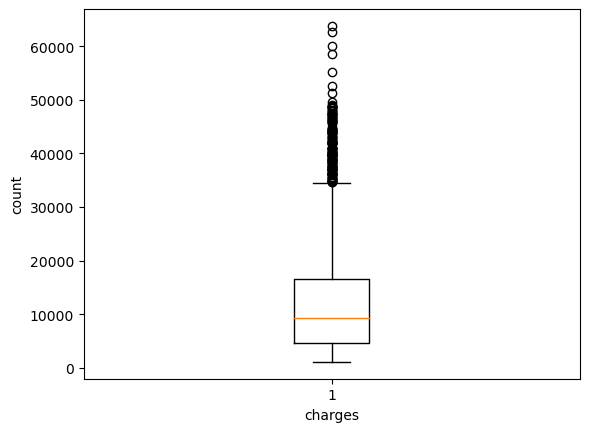

In [126]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [127]:
#I don't need Outliers,so extracting data without outliers

Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.bmi >= Q1 - 1.5*IQR) &(df.bmi <= Q3 + 1.5*IQR)]

Q1 = df.past_consultations.quantile(0.25)
Q3 = df.past_consultations.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.past_consultations >= Q1 - 1.5*IQR) & (df.past_consultations <= Q3 + 1.5*IQR)]

Q1 =df.Hospital_expenditure.quantile(0.25)
Q3 =df.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Hospital_expenditure >= Q1 - 1.5*IQR) & (df.Hospital_expenditure <= Q3 + 1.5*IQR)]

Q1 = df.Anual_Salary.quantile(0.25)
Q3 = df.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Anual_Salary >= Q1 - 1.5*IQR) & (df.Anual_Salary <= Q3 + 1.5*IQR)]


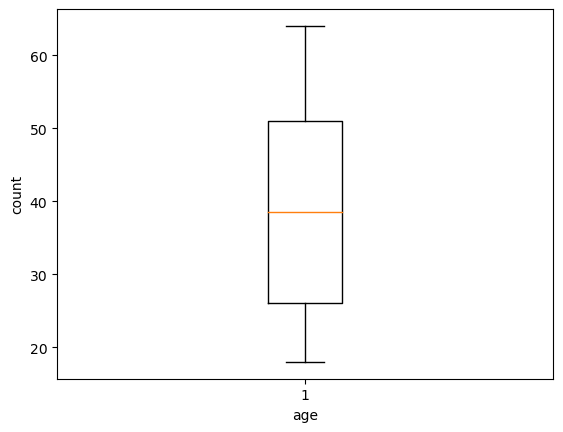

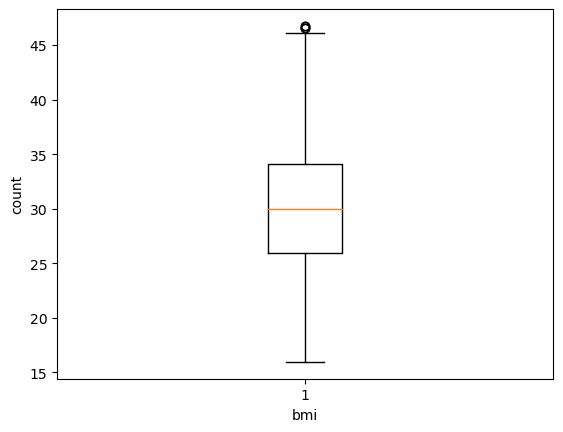

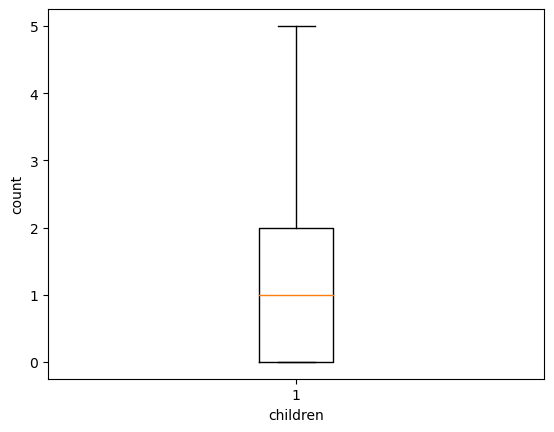

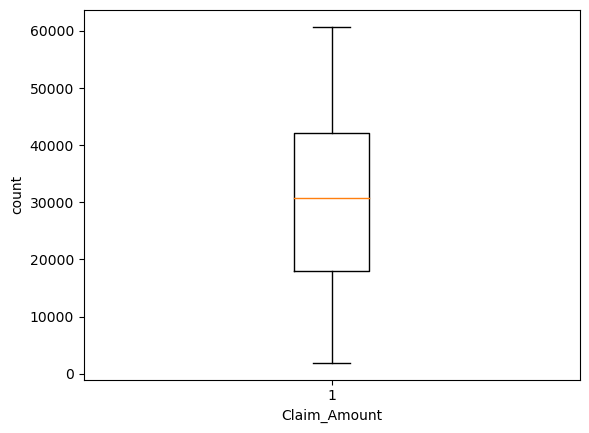

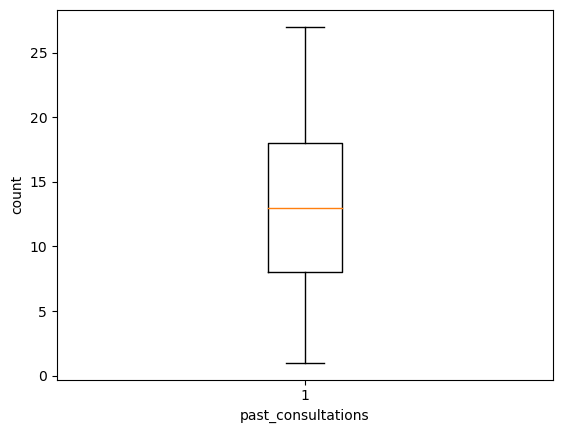

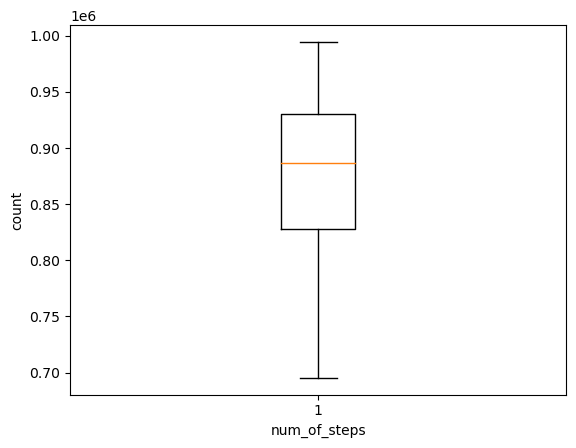

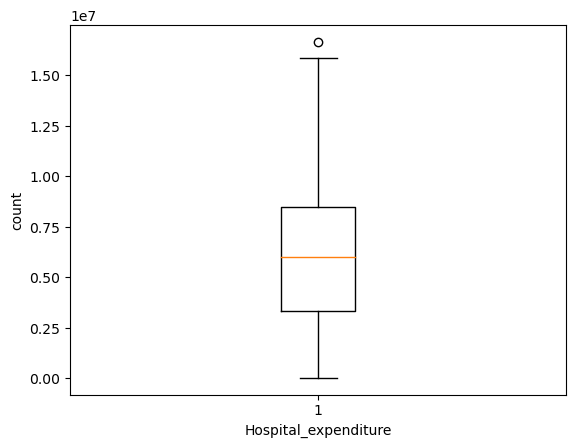

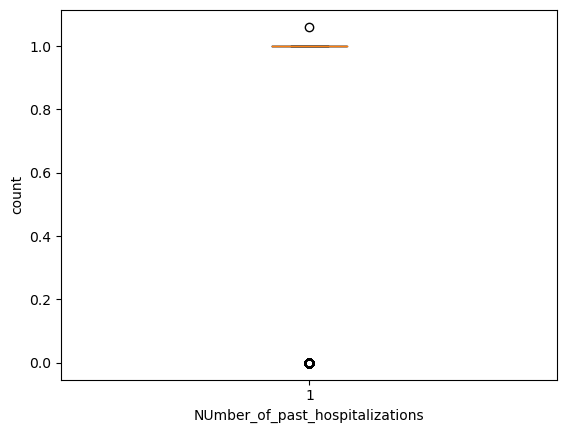

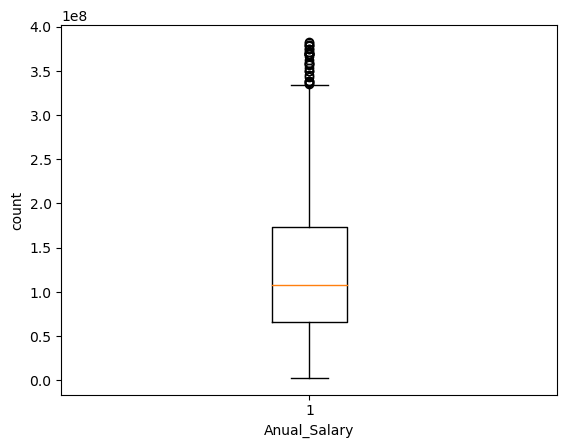

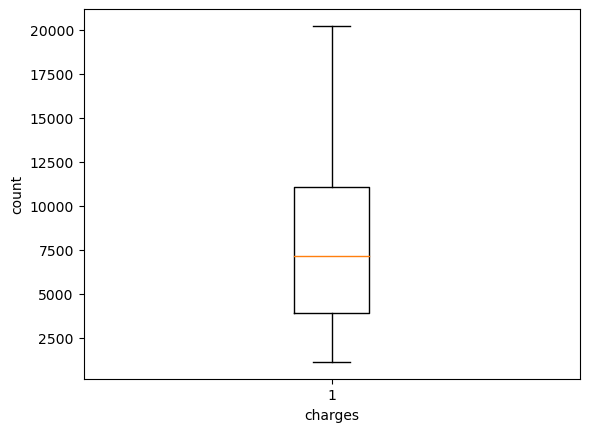

In [128]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [129]:
df.shape

(1030, 13)

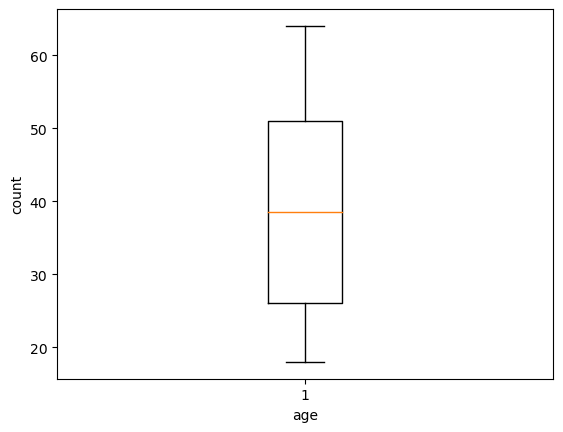

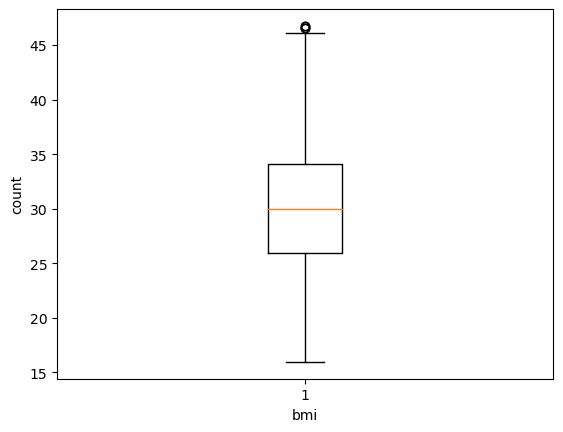

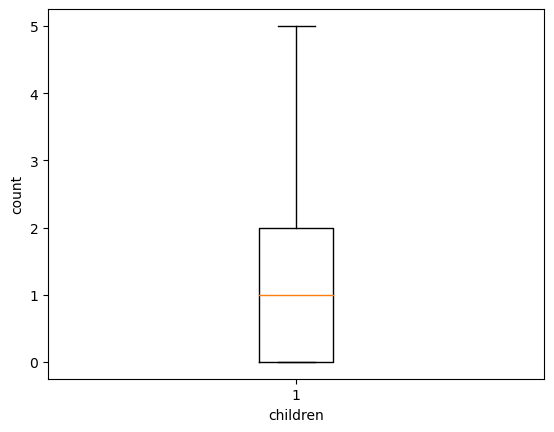

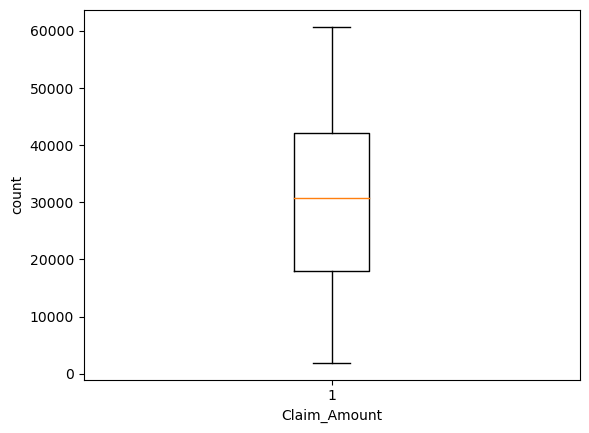

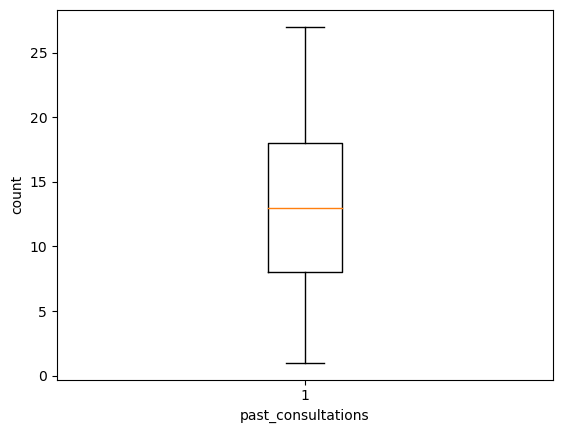

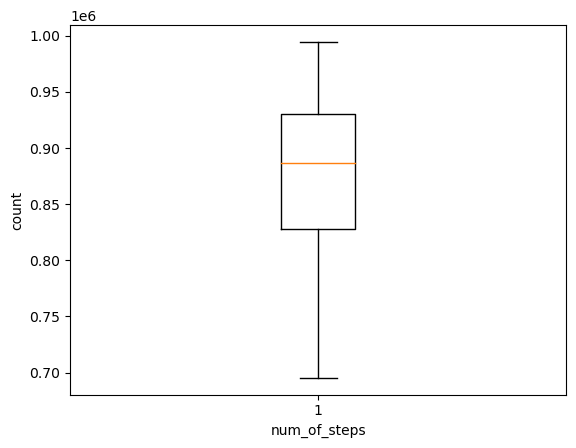

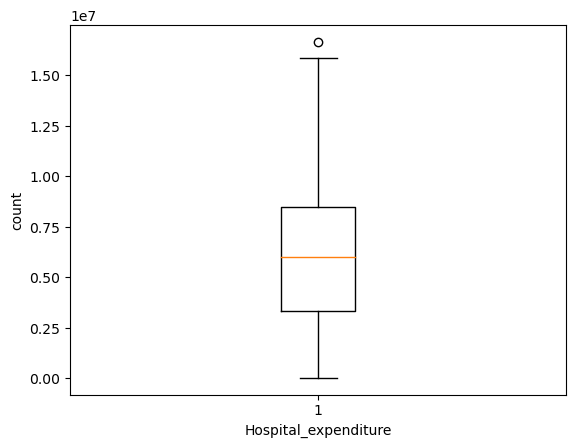

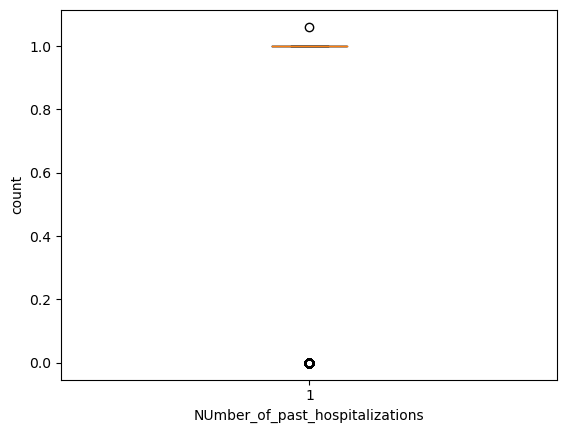

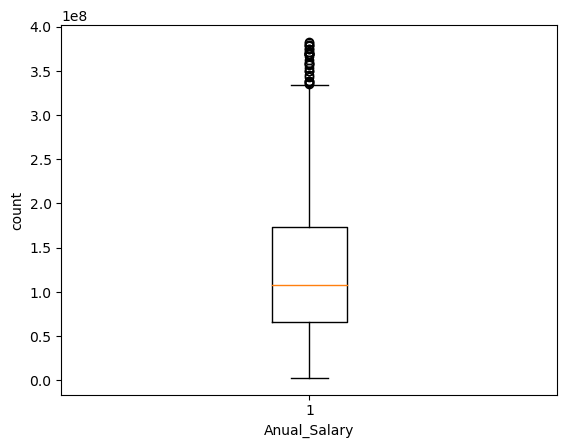

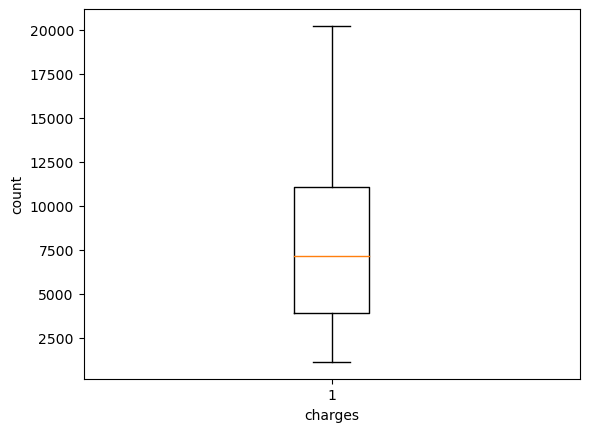

In [130]:
for col_name in col:
    if(df[col_name].dtypes=="int64" or df[col_name].dtypes=="float64"):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [131]:
df.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840,0.138470
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.138470,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)

In [133]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [134]:
x=df[col_list]
x

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [135]:
x.columns

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary'],
      dtype='object')

In [136]:
x.values

array([[1.80000000e+01, 2.32100000e+01, 0.00000000e+00, ...,
        4.72092099e+06, 0.00000000e+00, 5.57849700e+07],
       [1.80000000e+01, 3.01400000e+01, 0.00000000e+00, ...,
        4.32983168e+06, 0.00000000e+00, 1.37008852e+07],
       [1.80000000e+01, 3.33300000e+01, 0.00000000e+00, ...,
        6.88486077e+06, 0.00000000e+00, 7.35231073e+07],
       ...,
       [3.10000000e+01, 2.98100000e+01, 0.00000000e+00, ...,
        1.02899068e+07, 1.00000000e+00, 3.74530951e+08],
       [4.30000000e+01, 2.00450000e+01, 2.00000000e+00, ...,
        1.08303011e+07, 1.00000000e+00, 3.69684860e+08],
       [3.50000000e+01, 2.80250000e+01, 0.00000000e+00, ...,
        1.24774431e+07, 1.00000000e+00, 3.69684860e+08]])

In [137]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

                           feature        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [138]:
len(x.columns)

9

In [139]:
df=df.drop(['num_of_steps'], axis = 1)

In [140]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

                           feature        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [141]:
df=df.drop(['age'], axis = 1)

In [142]:
 col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

                           feature        VIF
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [143]:
df=df.drop(['bmi'], axis = 1)

In [144]:
 col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

                           feature       VIF
0                         children  1.977037
1                     Claim_Amount  4.547332
2               past_consultations  5.049165
3             Hospital_expenditure  4.492630
4  NUmber_of_past_hospitalizations  7.245972
5                     Anual_Salary  4.688833


In [145]:
df=df.drop(['NUmber_of_past_hospitalizations'], axis = 1)

In [146]:
 col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

                feature       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


In [147]:
df.columns

Index(['sex', 'children', 'smoker', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [157]:
x=df.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y=df['charges']

In [158]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,3.696849e+08


In [159]:
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1030, dtype: float64

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [161]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=0)


In [162]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(824, 5)
(824,)
(206, 5)
(206,)


In [163]:
l_model=LinearRegression()


In [164]:
l_model.fit(x_train, y_train)

LinearRegression()

In [169]:
predictions=l_model.predict(x_test)

In [170]:
predictions

array([ 7410.79368292, 10525.46032916,  4225.68186834, 11784.67064226,
        9710.44769939,  2920.28422479,  7675.02920953,  3974.05235591,
        1998.90729711,  1644.33779822,  9355.99422158,  6212.23827285,
        7039.69058406,  6913.4106462 ,  7297.0505273 ,  8116.21854337,
        5359.21098612, 11610.94654975, 10731.85265305,  4125.98535048,
        4978.27582415,  7076.11959566,  5297.22536169, 10517.54532015,
        7970.32302539,  9134.27913297,  3195.07752333,  2030.84851755,
        7974.5318319 ,  6784.2193549 ,  9063.13892275,  9603.83277347,
        7310.54589069,  3127.05229651, 10815.26325584,  6390.86195986,
        2959.61224858,  5861.07915274,  8191.7821509 ,  3550.84253838,
        2770.66188064,  7533.68996882,  9234.00165879,  4599.21923178,
        7080.45812909,  6040.26489712,  9148.59452641,  9621.34374207,
        1845.77904492,  4786.94915213, 10787.39907086, 10725.71531506,
       10417.07991619,  4695.22528892,  7214.06291723,  4625.56717867,
      

In [165]:
error_pred=pd.DataFrame(columns=('Actual_data','Prediction_data'))

In [166]:
error_pred

,Actual_data,Prediction_data


In [167]:
error_pred['Actual_data']=y_test


In [168]:
error_pred

,Actual_data,Prediction_data
752,10704.47000,NaN
723,10197.77220,NaN
177,2801.25880,NaN
834,11848.14100,NaN
718,10107.22060,NaN
...,...,...
627,8688.85885,NaN
993,16085.12750,NaN
426,5976.83110,NaN
895,12925.88600,NaN


In [172]:
error_pred['Prediction_data']=predictions
error_pred

,Actual_data,Prediction_data
752,10704.47000,7410.793683
723,10197.77220,10525.460329
177,2801.25880,4225.681868
834,11848.14100,11784.670642
718,10107.22060,9710.447699
...,...,...
627,8688.85885,5781.937583
993,16085.12750,14969.262737
426,5976.83110,4926.602197
895,12925.88600,11617.127211


In [173]:
error_pred.shape

(206, 2)

In [174]:
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

In [175]:
error_pred.head()

,Actual_data,Prediction_data,Error
752,10704.4700,7410.793683,3293.676317
723,10197.7722,10525.460329,-327.688129
177,2801.2588,4225.681868,-1424.423068
834,11848.1410,11784.670642,63.470358
718,10107.2206,9710.447699,396.772901


In [176]:
from sklearn.metrics import *

In [177]:
r2_on_test=r2_score(y_test, predictions)
r2_on_test

0.8436003409638111